In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# similarity

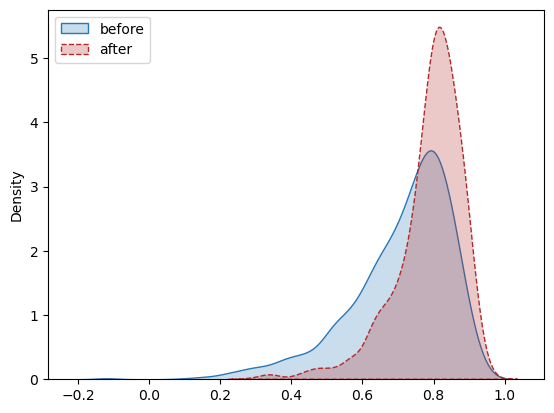

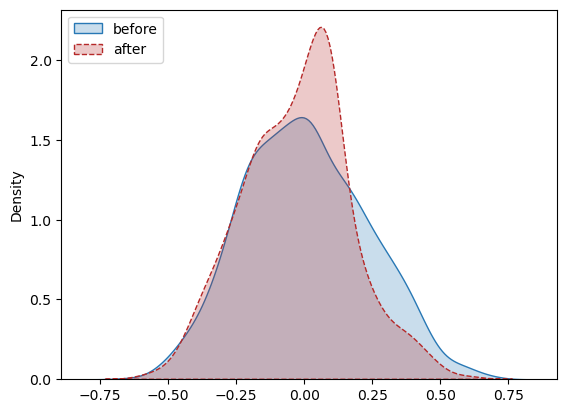

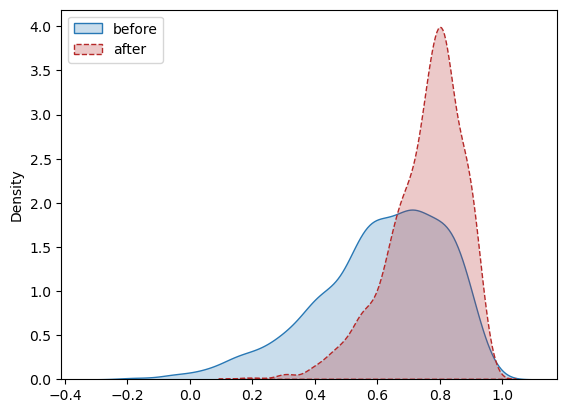

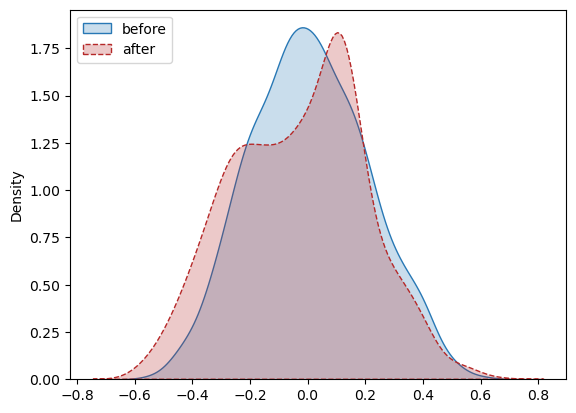

In [20]:
COLORS = ['#2878B5', '#B52828']
METHOD = ['cat']
DATASET = ['CASIA', 'tongji']

for method in METHOD:
    for dataset in DATASET:
        data_before = torch.load('../result/similarity/%s_%s_before.pt' % (method, dataset))
        data_after = torch.load('../result/similarity/%s_%s_after.pt' % (method, dataset))
        if method == 'reg':
            data_before = torch.sum(data_before, 1) / 3
            data_after = torch.sum(data_after, 1) / 3
        data_before = np.array([x.cpu().item() for x in data_before])
        data_after = np.array([x.cpu().item() for x in data_after])
        
        # 同类样本对
        plt.figure()
        ax = sns.kdeplot(data_before[:1500], fill=True, color=COLORS[0], label='before')
        ax = sns.kdeplot(data_after[:1500], fill=True, linestyle='--', color=COLORS[1], label='after')
        plt.legend(loc='upper left')
        plt.savefig('../result/similarity/same_%s_%s.jpg' % (method, dataset))
        
        # 异类样本对
        plt.figure()
        sns.kdeplot(data_before[1500:], fill=True, color=COLORS[0], label='before')
        sns.kdeplot(data_after[1500:], fill=True, linestyle='--', color=COLORS[1], label='after')
        plt.legend(loc='upper left')
        plt.savefig('../result/similarity/diff_%s_%s.jpg' % (method, dataset))

# identity 梯度下降

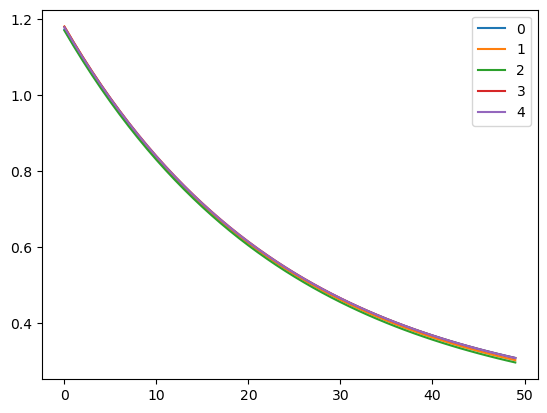

In [23]:
path = '../log/sum/CASIA_k=3_multi_size=3000_q=100_t=50_e=0.000001_mu=1.000000_tp=0.800000_tn=0.100000_lambda=0.010000_knn=1.log'

file = open(path, 'r')
J_list = []
cnt = 0
for line in file:
    is_done = line.find('val identity acc: ')
    index_J = line.find('J = ')
    if is_done == -1 and index_J  == -1:
        continue
    
    if is_done != -1:
        plt.plot(range(len(J_list)), J_list, label=cnt)
        J_list = []
        cnt += 1
    else:
        J_list.append(float(line[index_J + 3:].split(',')[0]))

plt.legend(loc='best')
plt.show()

# verify ROC

In [30]:
# 绘制 ROC 曲线
def draw_roc(fpr, tpr, name, linestyle, color):
    plt.plot(fpr, tpr, label='%s' % name, linestyle=linestyle, color=color)
    plt.plot([0, 1], [0, 1], '--', color='#D1D1D1')  # 对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='lower right')

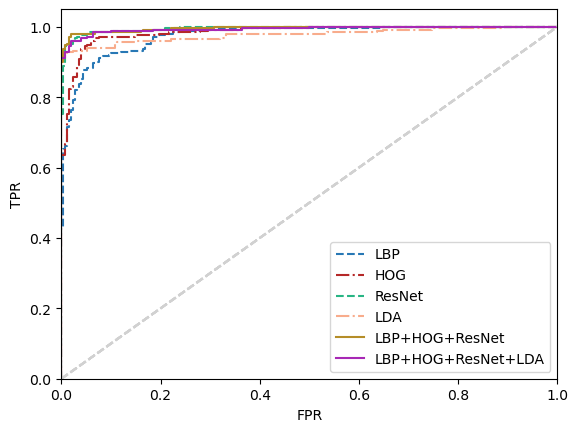

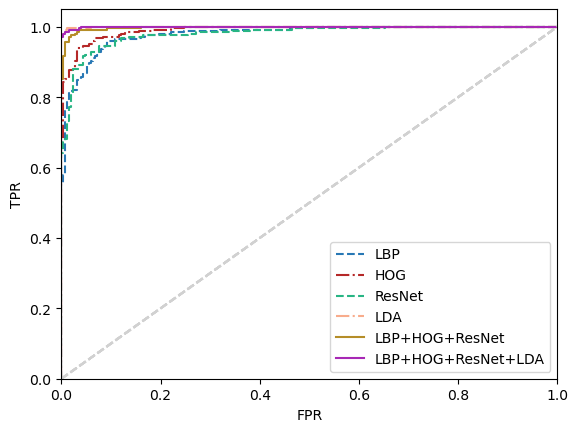

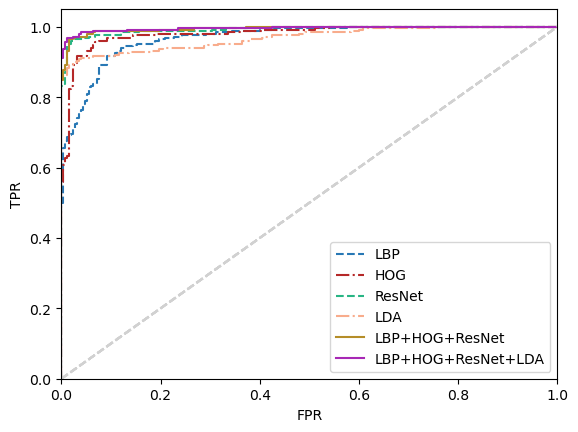

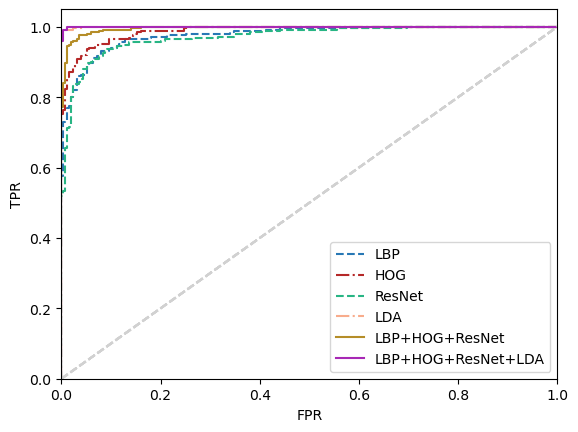

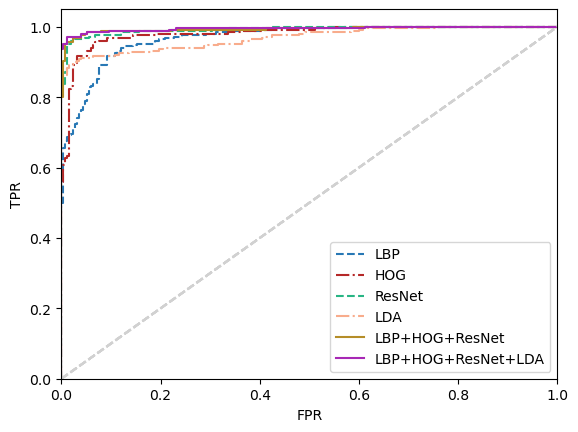

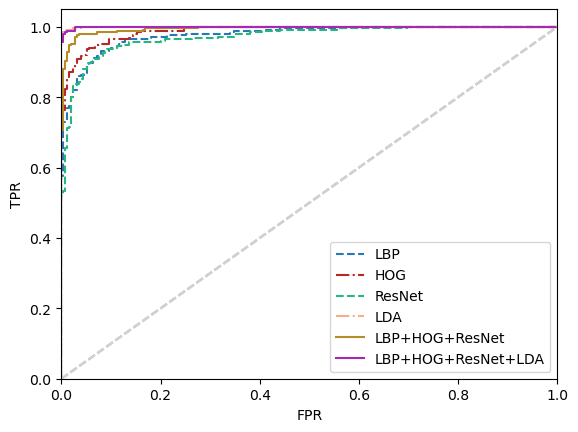

In [34]:
METHOD = ['cat', 'reg', 'sum']
DATASET = ['CASIA', 'tongji']
NAME = ['lbp', 'hog', 'res', 'lda', 'multi', 'multi']
LABEL = ['LBP', 'HOG', 'ResNet', 'LDA', 'LBP+HOG+ResNet', 'LBP+HOG+ResNet+LDA']
COLORS = ['#2878B5', '#B52828', '#28B584', '#F8AC8C', '#B58D28', '#A728B5']
STYLE = ['--', '-.', '--', '-.', '-', '-']

for method in METHOD:
    for dataset in DATASET:
        plt.figure()
        for i in range(len(NAME)):
            data = np.load('../result/%s/%s_k=%d_%s.npy' % (method, dataset, len(LABEL[i].split('+')), NAME[i]), allow_pickle=True).item()
            fpr = data['fpr']
            tpr = data['tpr']
            draw_roc(fpr, tpr, LABEL[i], STYLE[i], COLORS[i])
        plt.savefig('../result/%s_%s.jpg' % (method, dataset))